In [10]:
%matplotlib inline
import pylab
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import integrate
matplotlib.rcParams.update({'font.size': 22})
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Вычислительная математика

## Численные методы решения ОДУ

## Основная задача

Найти приближенное решение краевой задачи, например:
$$
\begin{align}
& u_{xx}(x) = f(x,u) \\
& u(0) = a \\
& u(1) = b
\end{align}
$$
или задачи Коши, например:
$$
\begin{align}
& u_t = f(t,u) \\
& u(0) = u_0
\end{align}
$$



## Пример численного метода
$$
\begin{align}
& u_{xx}(x) = f(x) \\
& u(0) = a, \; u(1) = b
\end{align}
$$

* Вместо непрерывной функции будем искать значения $U_0, \ldots, U_{m+1}$, $U_j \approx u(x_j)$, $x_j = jh$, $h = 1/(m+1)$

* Заменим 2-ю производную конечной разностью, получим систему уравнений:
$$
\frac{1}{h^2} \left( U_{j-1} - 2 U_j + U_{j+1} \right) = f(x_j), \quad j = 1,2,\ldots, m
$$
1-е и $m$-е уравнения содержат известные значения $U_0 = a$, $U_{m+1} = b$

## Пример численного метода
Получим систему линейных уравнений вида 
$$A U = F$$

$$
A = \frac{1}{h^2} \left[\begin{array}{cccccc}
-2 & 1 & \\
1 & -2 & 1 \\
  &  1 & -2 & 1 \\
  &    & \ddots & \ddots & \ddots \\
  &    &        & 1 & -2 & 1 \\
  &    &        &   &  1 & -2
\end{array}\right], \quad
F = \left[\begin{array}{c}
f(x_1) - a/h^2 \\
f(x_2) \\
f(x_3) \\
\vdots \\
f(x_{m-1}) \\
f(x_m) - b/h^2
\end{array}\right]
$$
* **Как $U$ приближает $u$**?

## Норма ошибки, сходимость

* Введем вектор ошибки:
$$
\hat{U} = \left[\begin{array}{c} 
u(x_1) \\ 
u(x_2) \\
\vdots \\
u(x_m)
\end{array}\right], \quad
E = U - \hat{U}
$$


* Нужно оценить норму ошибки, например:
$$
\Vert E \Vert_\infty = \max_j \vert E_j\vert
$$
Хотим, чтобы $\Vert E \Vert = O(h^p),\; h \to 0$

* **Определение (сходимость):** Численное решение *сходится* к точному с порядком $p$, если $\Vert E \Vert = O(h^p),\; h \to 0$

## Невязка, аппроксимация
* Мы знаем, что КР формула имеет 2-й порядок аппроксимации, т.е. 
$$
\frac{1}{h^2} \left(u(x_{j-1}) - 2 u(x_j) + u(x_{j+1})\right) - f(x_j) = r_j =\frac{1}{12} h^2 u^{(4)}(x_j) + O(h^4) = O(h^2)
$$

* Введем вектор невязки с компонентами $r_j$:
$$
r = A\hat{U} - F, \quad A \hat{U} = F + r
$$
$\Vert r \Vert = O(h^2)$

* **Определение (аппроксимация)** Разностная задача *аппроксимирует* дифференциальную задачу с порядком $p$, если $\Vert r \Vert = O(h^p)$

## Связь ошибки и невязки, устойчивость
$$
\left\{\begin{array}{l}
A_m U = F\\
A_m \hat{U} = F + r
\end{array}
\right.
\Rightarrow \; A_m E = -r \; \Rightarrow \; E = A_m^{-1} r \; \Rightarrow \; \Vert E \Vert \le \Vert A_m^{-1} \Vert \Vert r \Vert
$$

* При $h \to 0$, $m \to \infty$, т.е. размер матрицы $A_m$ переменный

* Для того, чтобы ошибка убывала так же, как невязка, достаточно равномерной ограниченности последовательности $A_m^{-1}$:
$$
\Vert A_{m}^{-1} \Vert \le C \quad \forall m > m_0 \Rightarrow \quad \Vert E \Vert \le \Vert A_m^{-1} \Vert \Vert r \Vert \le C \Vert r \Vert = O(h^2)
$$

* **Определение (устойчивость)** Численный метод называется устойчивым, если $\exists m_0 :\Vert A_{m}^{-1} \Vert \le C \quad \forall m > m_0$

## Основная теорема 
**Теорема**   
Если численный метод *аппроксимируют* дифференциальную задачу с порядком $p$ и является *устойчивым*, то численное решение *сходится* к точному с порядком $p$. 

Аппроксимация + Устойчивость $\Rightarrow$ Сходимость

* **Аппроксимацию и устойчивость можно проверить, не зная точное решение.**

## Исследование устойчивости
* Матрица $A$ - симметричная, $\Vert A \Vert_2 = \max_p \vert \lambda_p\vert$, $\Vert A^{-1} \Vert = \left(\min \vert \lambda_p\vert \right)^{-1}$


* Собственные векторы и собственные числа матрицы $A$:
$$
\lambda_p = \frac{2}{h^2} \left(\cos(p \pi h) - 1\right), \quad u_j^p = \sin(p \pi j h) \; p = 1, \ldots, m
$$

$$
\begin{align}
(Au^p)_j & = \frac{1}{h^2} (u_{j-1}^p - 2 u_j^p + u_{j+1}^p) = \\
& =\frac{1}{h^2} (\sin (p \pi (j-1)h) - 2 \sin(p\pi j h) + \sin(p \pi (j+1) h)) = \quad // \sin(a \pm b) = \sin a \cos b \pm \cos a \sin b // \\
& =\frac{1}{h^2} (2 \sin (p \pi j h) \cos(p \pi h) - 2\sin (p \pi j h)) = \lambda_p u_j^p
\end{align}
$$

* Минимальное с.ч $\lambda_1 = \frac{2}{h^2} (\cos(\pi h) - 1) = \frac{2}{h^2} (-\frac{1}{2} \pi^2 h^2 + O(h^4)) = - \pi^2 + O(h^2)$

## Численные методы для решения задачи Коши
Рассмотрим задачу Коши:
$$
\begin{align}
& u_t (t) = f(t,u), \; t \in[0,1] \\
& u(0) = u_0
\end{align}
$$

* Введем сетку $t_n = n \Delta t$, $n = 0, \ldots, N$, $\Delta t = 1/N$, будем искать $U_n \approx u(t_n)$

* Заменим производную конечной-разностью, получим систему уравнений:
$$
\begin{align}
& \frac{1}{\Delta t} (U_{n+1} - U_n) = f(t_n,U_n), \; n = 0, N-1 \\
& U_0 = u_0
\end{align}
$$

* В отличие от краевой задачи, значения $U^n$ можно вычислять реккурентно:
$$
U_{n+1} = U_n + \Delta t f(t_n, U_n)
$$
поэтому устойчивость будет определятся свойствами метода на одном шаге по времени.

## Устойчивость метода Эйлера

Рассмотрим тестовую задачу:
$$
\begin{array}{l}
u'(t) = \lambda u(t) + g(t) \\
u(t_0) = u_0
\end{array}, \quad
u(t) = e^{\lambda (t - t_0)} u_0 + \int_{t_0}^{t} e^{\lambda (t - \tau)} g(\tau) \, d \tau
$$

Метод Эйлера
$$
U_{n+1} = U_n + \Delta t (\lambda U_n + g(t_n)) = (1 + \Delta t \lambda) U_n + \Delta t  g(t_n)
$$

Ошибка аппроксимации (невязка):
$$
r_n = \left( \frac{u(t_{n+1}) - u(t_n)}{\Delta t}\right) - (\lambda u(t_n) + g(t_n)) = \left(u'(t_n) + \frac{1}{2} \Delta t u''(t_n) + O(\Delta t^2) \right) = \frac{1}{2} \Delta t u''(t_n) + O(\Delta t^2)
$$

## Устойчивость метода Эйлера
* Связь ошибки и невязки:
$$
\left\{\begin{array}{l}
U_{n+1} = (1 + \Delta t \lambda) U_n + \Delta t  g(t_n) \\
u(t_{n+1}) = (1 + \Delta t \lambda) u(t_n) + \Delta t g(t_n) + \Delta t r_n
\end{array}\right. \Rightarrow \quad
E_{n+1} = (1 + \Delta t \lambda) E_n - \Delta t r_n
$$

* В данном случае можно явно выразить все ошибки через невязку и ошибку в $t_0$:
$$
E_n = (1 + \Delta t \lambda)^n E_0 - \Delta t \sum_{m=1}^n (1 + \Delta t \lambda)^{n-m} r_{m-1}
$$

* $\lvert 1 + \Delta t \lambda \rvert \le \exp(|\lambda| \Delta t) \Rightarrow$ $(1 + \Delta t \lambda) ^{n-m} \le e^{(n-m)\Delta t |\lambda|} \le e^{n \Delta t |\lambda|} \le e^{|\lambda| T}$ , $T = N \Delta t$

* 
$$
\lvert E_n \rvert \le e^{|\lambda| T} \left(|E_0| + \Delta t \sum_{m=1}^n \lvert r_{m-1}\rvert \right) \le e^{|\lambda| T} \left(\lvert E_0 \rvert + n \Delta t \lVert r\rVert_\infty\right) = e^{|\lambda| T} \left(\lvert E_0 \rvert + T \lVert r\rVert_\infty\right)
$$

## Методы высокого порядка
* Для увеличения порядка сходимости нужно увеличить порядок аппроксимации. Можно выделить 2 класса методов высокого порядка:
    1. Многошаговые (на каждом шаге используется много предыдущих значений)
    2. Одношаговые (внутри одного шага по времени вычисляются промежуточные значения)

* Пример: многошагового метода:
$$
\begin{align}
& \frac{U^{n+1} - U^{n-1}}{2h} = f(t_n, U^{n}) \\
& U^{n+1} = U^{n-1} + 2h f(t_n,U^n), n = 1,\ldots,N
\end{align}
$$
* Пример одношагового многостадийного метода (метод Рунге-Кутты):
$$
\begin{align}
& k_1 = f(t_n,U^n) \\
& k_2 = f(t_n + \frac{h}{2}, U^n + \frac{h}{2}k_1) \\
& U^{n+1} = U^n + h k_2
\end{align}
$$

## Многошаговые методы
* Общий вид:
$$
\sum_{j=0}^{s} a_j U^{n+j} = \Delta t \sum_{j = 0}^{s} b_j f^{n+j}
$$

* Условия порядка: метод имеет порядок аппроксимации $p$, если 
$$
\begin{align}
& \sum_{j = 0}^r a_j = 0 \\
& \sum_{j=0}^r \frac{1}{k!} j^k a_j = \sum_{j=0}^r \frac{1}{(k-1)!} j^{k-1}b_j, \; k = 1, \ldots, p
\end{align}
$$


## Одношаговые методы (методы Рунге-Кутты)
* Общий вид:
Общий вид методов Рунге-Кутты:
$$
\begin{align}
k_i = f(t_n + c_jh, U_n + h \sum_{j = 1}^s a_{ij} k_j), \; i = 1,\ldots, s,  \quad U_{n+1} = U_n + h \sum_{j=1}^s b_j k_j
\end{align}
$$
Таблица Бутчера:
$$
\begin{array}{c|cccc}
c_1    & a_{11} & a_{12}& \dots & a_{1s}\\
c_2    & a_{21} & a_{22}& \dots & a_{2s}\\
\vdots & \vdots & \vdots& \ddots& \vdots\\
c_s    & a_{s1} & a_{s2}& \dots & a_{ss} \\
\hline
       & b_1    & b_2   & \dots & b_s\\
\end{array} = 
\begin{array}{c|c}
\mathbf{c}& A\\
\hline
          & \mathbf{b^T} \\
\end{array}
$$

## Одношаговые методы (методы Рунге-Кутты)

* Условия порядка (нелинейные уравнения):
* Первый порядок:
$$
\begin{align}
&\sum_{j=1}^{s} a_{ij} = c_i, i=1,\ldots,s  \\
&\sum_{j=1}^{s} b_j = 1
\end{align}
$$
* Второй порядок (+ к предыдущим условиям):
$$
\begin{align}
\sum_{j=1}^{s} b_j c_j = \frac{1}{2}
\end{align}
$$
* Третий порядок (+ к предыдущим условиям):
$$
\begin{align}
& \sum_{j=1}^{s} b_j c_j^2 = \frac{1}{3} \\
& \sum_{i=1}^{s} \sum_{j=1}^{s} b_i a_{ij} c_j = \frac{1}{6}
\end{align}
$$


## Методы Рунге-Кутты, подклассы
$$
\begin{align}
k_i = f(t_n + c_jh, U_n + h \sum_{j = 1}^s a_{ij} k_j), \; i = 1,\ldots, s,  \quad U_{n+1} = U_n + h \sum_{j=1}^s b_j k_j
\end{align}
$$
1. Явные методы ($a_{ij} = 0, \; j\ge i$)
2. Неявные методы
3. Диагонально неявные ($a_{ij} = 0, \; j> i$) (DIRK)
4. Однократно диагонально неявные ($a_{ij} = 0, \; j> i$, $a_{ii} = a_{11}$) (SDIRK)

## Пример. 
$$
\left\{
\begin{array}{l}
u'(t) = v(t)\\
v'(t) = -u(t)
\end{array}
\right.
$$
$V = [u,v]^T$, $V(0) = [1,0]^T$

Применим три метода:
* явный метод Эйлера
* неявный метод Эйлера
* метод трапеций

In [11]:
def solve_euler_e(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])
    A = np.array([[0, 1],[-1, 0]])
    for k in range(n):
        V[:,k+1] = (np.eye(2) + h * A) @ V[:,k]
    return V
def solve_euler_i(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])
    A = np.array([[0, 1],[-1, 0]])
    G = (np.eye(2) - h * A)
    Gi = np.linalg.inv(G)
    for k in range(n):
        V[:,k+1] = Gi @ V[:,k]
    return V
def solve_trap(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])
    A = np.array([[0, 1],[-1, 0]])
    G1 = (np.eye(2) - h/2 * A)
    Gi = np.linalg.inv(G1) @ (np.eye(2) + h/2 * A)
    for k in range(n):
        V[:,k+1] = Gi @ V[:,k]
    return V

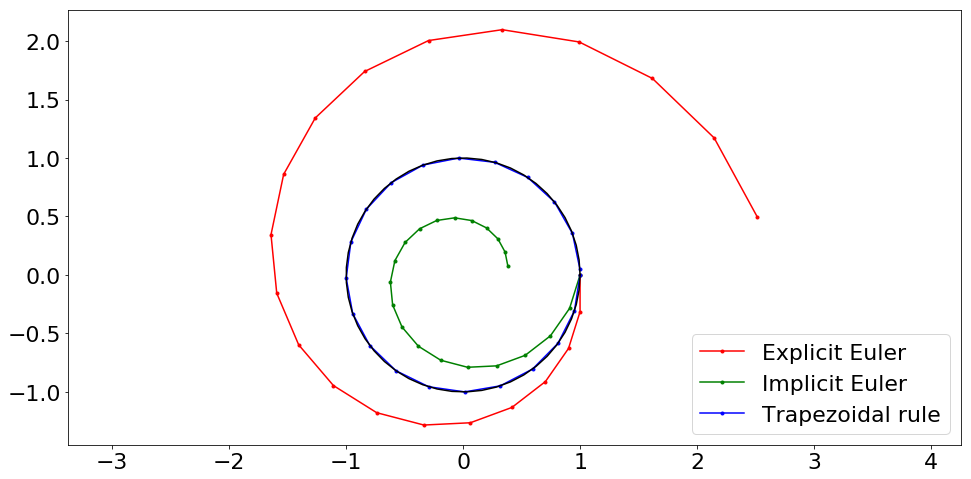

In [12]:
V1 = solve_euler_e(2* np.pi, 20)
V2 = solve_euler_i(2* np.pi, 20)
V3 = solve_trap(2 * np.pi, 20)
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(V1[0,:], V1[1,:], 'r.-', label = 'Explicit Euler')
ax.plot(V2[0,:], V2[1,:], 'g.-', label = 'Implicit Euler')
ax.plot(V3[0,:], V3[1,:], 'b.-', label = 'Trapezoidal rule')
t = np.linspace(0,2*np.pi)
ax.plot(np.cos(t), np.sin(t),'k-')
ax.axis('equal')
ax.legend()